In [1]:
import numpy as np
import sys
sys.path.append("/Users/lls/Documents/mlhalos_code/")
from mlhalos import parameters
from scripts.hmf import hmf
import pynbody
from scripts.hmf import halo_mass as hm
from scripts.hmf.larger_sim import hmf_analysis as ha

In [2]:
ic = parameters.InitialConditionsParameters(initial_snapshot="/Users/lls/Documents/CODE/sim200/sim200.gadget3", 
                                            final_snapshot="/Users/lls/Documents/CODE/standard200/snapshot_011", 
                                            path="/Users/lls/Documents/CODE/")

In [3]:
ic_small = parameters.InitialConditionsParameters(path="/Users/lls/Documents/CODE/")

In [4]:
PS_pred_mass_sk = np.load("/Users/lls/Documents/CODE/stored_files/hmf/volume_sharp_k/"
                          "PS_predicted_mass_100_scales_extended_low_mass_range.npy")

In [9]:
ps_large = np.load("/Users/lls/Documents/CODE/stored_files/hmf/sim200/volume_sharp_k/ALL_PS_predicted_masses.npy")
ps_small = np.load("/Users/lls/Documents/CODE/stored_files/hmf/volume_sharp_k/"
                          "PS_predicted_mass_100_scales_extended_low_mass_range.npy")

In [6]:
st_large = np.load("/Users/lls/Documents/CODE/stored_files/hmf/sim200/volume_sharp_k/ALL_ST_predicted_masses.npy")
st_small = np.load("/Users/lls/Documents/CODE/stored_files/hmf/volume_sharp_k/"
                          "ST_predicted_mass_100_scales_extended_low_mass_range.npy")

# Calculate HMF from predicted masses

In [51]:
log_M_min=10
log_M_max=15
delta_log_M=0.19

log_m_bins = np.arange(log_M_min, log_M_max, delta_log_M)
mid_log = (log_m_bins[1:] + log_m_bins[:-1])/2

## Press-Schechter

In [52]:
# Press -Schechter

n_ps_large = ha.get_empirical_number_density_halos(ps_large, ic, boxsize=200, delta_log_M=delta_log_M)
n_ps_small = ha.get_empirical_number_density_halos(ps_small, ic_small, boxsize=50, delta_log_M=delta_log_M)

m_th, num_theory_ps = ha.get_theory_number_density_halos("PS", ic, boxsize=200, delta_log_M=delta_log_M)

sigma8 is 0.817


/Users/lls/anaconda/envs/py35/lib/python3.5/site-packages/pynbody/analysis/hmf.py:168: RuntimeWarning: Power spectrum does not extend to low enough k; using power-law extrapolation (this is likely to be fine)
  "Power spectrum does not extend to low enough k; using power-law extrapolation (this is likely to be fine)", RuntimeWarning)
/Users/lls/anaconda/envs/py35/lib/python3.5/site-packages/scipy/integrate/quadrature.py:706: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.465313e-03
  AccuracyWarning)
/Users/lls/anaconda/envs/py35/lib/python3.5/site-packages/scipy/integrate/quadrature.py:706: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.621868e-03
  AccuracyWarning)
/Users/lls/anaconda/envs/py35/lib/python3.5/site-packages/scipy/integrate/quadrature.py:706: AccuracyWarning: divmax (10) exceeded. Latest difference = 8.779033e-04
  AccuracyWarning)


In [ ]:
# Previous results starting from higher mass scales

In [ ]:
# Top hat volume for comparison

ps_th = np.load("/Users/lls/Documents/CODE/stored_files/hmf/sim200/ALL_PS_predicted_masses.npy")
n_th = hm.get_empirical_number_density_halos(ps_th, ic, log_m_bins=log_m_bins)

## Sheth-Tormen

In [54]:
# Sheth-Tormen

n_st_large = ha.get_empirical_number_density_halos(st_large, ic, boxsize=200, delta_log_M=delta_log_M)
n_st_small = ha.get_empirical_number_density_halos(st_small, ic_small, boxsize=50, delta_log_M=delta_log_M)

m_th, num_theory_st = ha.get_theory_number_density_halos("ST", ic, boxsize=200, delta_log_M=delta_log_M)

/Users/lls/anaconda/envs/py35/lib/python3.5/site-packages/pynbody/analysis/hmf.py:168: RuntimeWarning: Power spectrum does not extend to low enough k; using power-law extrapolation (this is likely to be fine)
  "Power spectrum does not extend to low enough k; using power-law extrapolation (this is likely to be fine)", RuntimeWarning)
/Users/lls/anaconda/envs/py35/lib/python3.5/site-packages/scipy/integrate/quadrature.py:706: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.465313e-03
  AccuracyWarning)
/Users/lls/anaconda/envs/py35/lib/python3.5/site-packages/scipy/integrate/quadrature.py:706: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.621868e-03
  AccuracyWarning)


sigma8 is 0.817


/Users/lls/anaconda/envs/py35/lib/python3.5/site-packages/scipy/integrate/quadrature.py:706: AccuracyWarning: divmax (10) exceeded. Latest difference = 8.779033e-04
  AccuracyWarning)


In [68]:
# Top hat volume for comparison

st_tophat = np.load("/Users/lls/Documents/CODE/stored_files/hmf/sim200/ALL_PS_predicted_masses.npy")
n_st_tophat = ha.get_empirical_number_density_halos(st_tophat, ic, boxsize=200)

# Plot

In [15]:
import matplotlib.pyplot as plt
from mlhalos import distinct_colours
%matplotlib inline

In [56]:
m_bins = 10**log_m_bins
mass = 10**mid_log

colors = distinct_colours.get_distinct(4)

In [225]:
m_min_small = ic_small.halo[0]['mass'].in_units("Msol h**-1")[0] * 100
m_min_large = ic.halo[0]['mass'].in_units("Msol h**-1")[0] * 100

m_max_ps_large = 10**mid_log[np.where(num_theory_ps*(200**3) >= 10)[0][-1]]
m_max_ps_small = 10**mid_log[np.where(num_theory_ps*(50**3) >= 5)[0][-1]]

range_small_ps = (mass >= m_min_small) & (mass <= m_max_ps_small) 
range_large_ps = (mass >= m_min_large) & (mass <= m_max_ps_large) 

m_max_st_large = 10**mid_log[np.where(num_theory_st*(200**3) >= 10)[0][-1]]
m_max_st_small = 10**mid_log[np.where(num_theory_st*(50**3) >= 5)[0][-1]]

range_small_st = (mass >= m_min_small) & (mass <= m_max_st_small) 
range_large_st = (mass >= m_min_large) & (mass <= m_max_st_large)

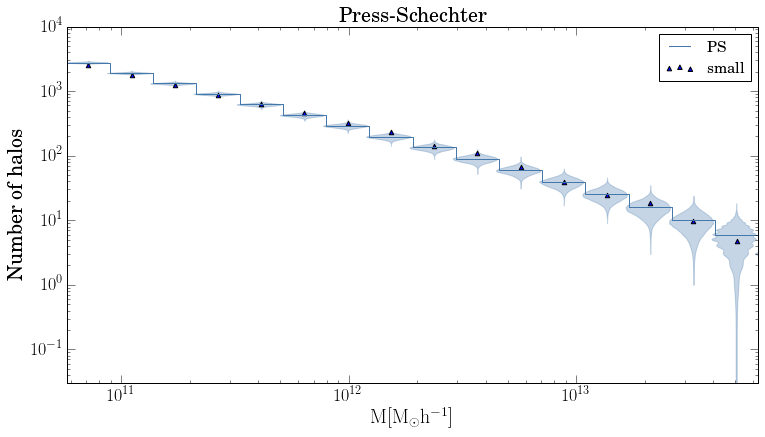

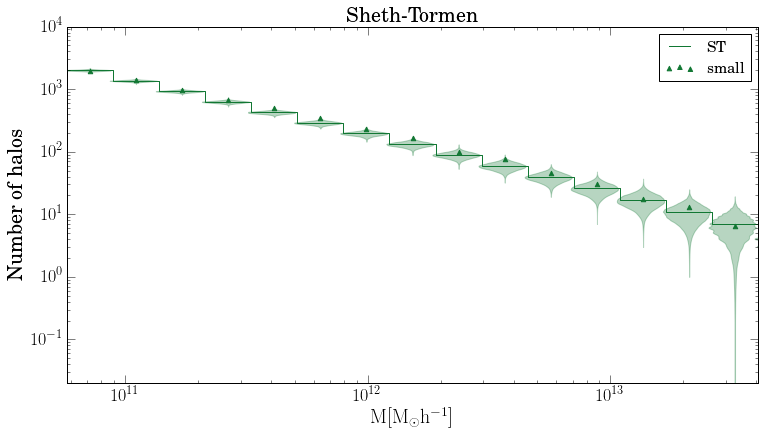

In [242]:
# Small box only

V = 50**3

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

poisson_ps = [np.random.poisson(num_i, 10000) for num_i in num_theory_ps*V]
delta_m = np.diff(10**log_m_bins)

vplot = axes.violinplot(poisson_ps, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

axes.step(m_bins[:-1], num_theory_ps*V, where="post", color=colors[0], label="PS")
axes.plot([m_bins[-2], m_bins[-1]], [num_theory_ps[-1]*V, num_theory_ps[-1]*V], color=colors[0])
[b.set_color(colors[0]) for b in vplot['bodies']]
          
plt.scatter(10**mid_log[range_small_ps], n_ps_small[range_small_ps]*V, label="small", marker="^")

# plt.scatter(10**mid_log, n_th, label="top-hat")
plt.legend(loc="best", fontsize=15)
plt.xscale("log")
plt.yscale("log")

plt.xlim(m_min_small, 10**(np.log10(m_max_ps_small) + (delta_log_M/2)))
plt.ylim(0, 10**4)

plt.ylabel("Number of halos")
plt.xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
plt.title("Press-Schechter")
plt.savefig("/Users/lls/Documents/CODE/stored_files/hmf/plots/small_vs_large/small_box_PS.png")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

poisson_st = [np.random.poisson(num_i, 10000) for num_i in num_theory_st*V]
vplot = axes.violinplot(poisson_st, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

axes.step(m_bins[:-1], num_theory_st*V, where="post", color=colors[3], label="ST")
axes.plot([m_bins[-2], m_bins[-1]], [num_theory_st[-1]*V, num_theory_st[-1]*V], color=colors[3])
[b.set_color(colors[3]) for b in vplot['bodies']]
          
plt.scatter(10**mid_log[range_small_st], n_st_small[range_small_st]*V, label="small", marker="^", color=colors[3])

plt.legend(loc="best", fontsize=15)
plt.xscale("log")
plt.yscale("log")

plt.xlim(m_min_small, 10**(np.log10(m_max_st_small) + (delta_log_M/2)))
plt.ylim(0, 10**4)

plt.ylabel("Number of halos")
plt.xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
plt.title("Sheth-Tormen")
plt.savefig("/Users/lls/Documents/CODE/stored_files/hmf/plots/small_vs_large/small_box_ST.png")

In [236]:
import importlib
importlib.reload(lh)

<module 'scripts.hmf.likelihood' from '/Users/lls/Documents/mlhalos_code/scripts/hmf/likelihood.py'>

In [239]:
print(lh.chi_squared_each_bin(n_ps_small[range_small_ps]*V, num_theory_ps[range_small_ps]*V))
lh.chi_squared_each_bin(n_st_small[range_small_st]*V, num_theory_st[range_small_st]*V)

[  2.58450535e+01   6.83016320e+00   5.72405811e+00   3.95782024e-01
   3.80320589e-01   1.51450016e+00   2.20196509e+00   5.36363789e+00
   3.86051865e-01   4.65790916e+00   8.04744821e-01   9.51598696e-04
   1.43954539e-02   4.79359776e-01  -7.81604891e-03   8.50551343e-02]


array([  5.67770237e-01,   2.71167762e+00,   1.99764915e+00,
         4.48455995e+00,   1.17366870e+01,   9.40335461e+00,
         6.83838309e+00,   8.99155104e+00,   9.16805626e-01,
         4.69721054e+00,   7.20764109e-01,   6.09788336e-01,
         6.49301333e-02,   4.73974209e-01,  -1.12781105e-02])

In [231]:
lh_small_ps = lh.chi_squared(n_ps_small[range_small_ps]*V, num_theory_ps[range_small_ps]*V)
lh_small_st = lh.chi_squared(n_st_small[range_small_st]*V, num_theory_st[range_small_st]*V)

In [234]:
dof_ps = len(n_ps_small[range_small_ps])
dof_st = len(n_st_small[range_small_st])

print("chi-sq of PS small box is " + "%.3f" % lh_small_ps 
      + " (dof = " + str(dof_ps) + "). " 
      "Chi-sq/dof = "+"%.3f" % (lh_small_ps/dof_ps))
print("chi-sq of ST small box is " + "%.3f" % lh_small_st 
      + " (dof = " + str(dof_st) + "). "
      "Chi-sq/dof = "+"%.3f" % (lh_small_st/dof_st))

chi-sq of PS small box is 54.676 (dof = 16). Chi-sq/dof = 3.417
chi-sq of ST small box is 54.204 (dof = 15). Chi-sq/dof = 3.614


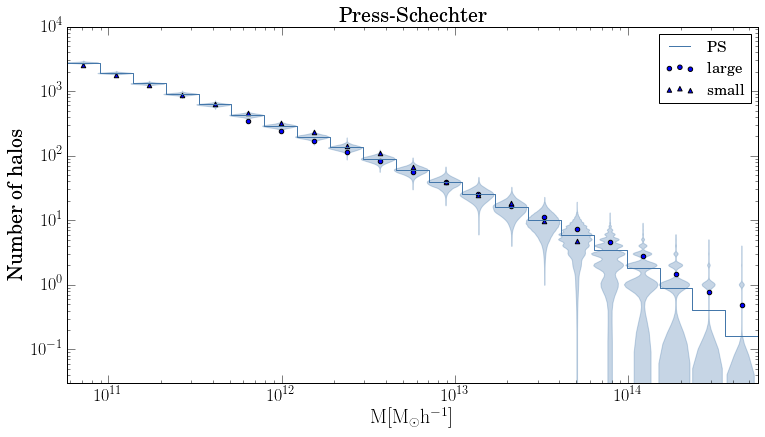

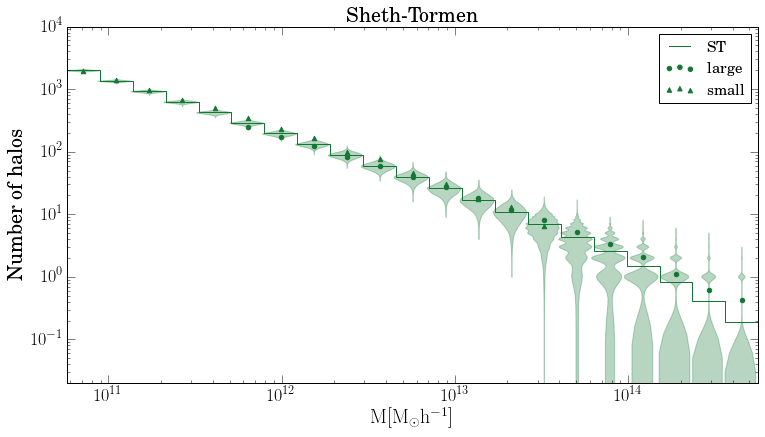

In [243]:
V = 50**3

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

poisson_ps = [np.random.poisson(num_i, 10000) for num_i in num_theory_ps*V]
delta_m = np.diff(10**log_m_bins)

vplot = axes.violinplot(poisson_ps, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

axes.step(m_bins[:-1], num_theory_ps*V, where="post", color=colors[0], label="PS")
axes.plot([m_bins[-2], m_bins[-1]], [num_theory_ps[-1]*V, num_theory_ps[-1]*V], color=colors[0])
[b.set_color(colors[0]) for b in vplot['bodies']]
          
plt.scatter(10**mid_log[range_large_ps], n_ps_large[range_large_ps]*V, label="large")
plt.scatter(10**mid_log[range_small_ps], n_ps_small[range_small_ps]*V, label="small", marker="^")

# plt.scatter(10**mid_log, n_th, label="top-hat")
plt.legend(loc="best", fontsize=15)
plt.xscale("log")
plt.yscale("log")

plt.xlim(np.array([m_min_small, m_min_large]).min(), 
         10**(np.log10((np.array([m_max_ps_large, m_max_ps_small]).max())) + (delta_log_M/2)))
plt.ylim(0, 10**4)

plt.ylabel("Number of halos")
plt.xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
plt.title("Press-Schechter")
plt.savefig("/Users/lls/Documents/CODE/stored_files/hmf/plots/small_vs_large/small_and_large_PS.png")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

poisson_st = [np.random.poisson(num_i, 10000) for num_i in num_theory_st*V]
vplot = axes.violinplot(poisson_st, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

axes.step(m_bins[:-1], num_theory_st*V, where="post", color=colors[3], label="ST")
axes.plot([m_bins[-2], m_bins[-1]], [num_theory_st[-1]*V, num_theory_st[-1]*V], color=colors[3])
[b.set_color(colors[3]) for b in vplot['bodies']]
          
plt.scatter(10**mid_log[range_large_st], n_st_large[range_large_st]*V, label="large", color=colors[3])
plt.scatter(10**mid_log[range_small_st], n_st_small[range_small_st]*V, label="small", marker="^", color=colors[3])

plt.legend(loc="best", fontsize=15)
plt.xscale("log")
plt.yscale("log")

plt.xlim(np.array([m_min_small, m_min_large]).min(), 
         10**(np.log10((np.array([m_max_st_large, m_max_st_small]).max())) + (delta_log_M/2)))
plt.ylim(0, 10**4)

plt.ylabel("Number of halos")
plt.xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
plt.title("Sheth-Tormen")
plt.savefig("/Users/lls/Documents/CODE/stored_files/hmf/plots/small_vs_large/small_and_large_ST.png")

The theoretical HMF is the theoretically predict number of halos in a box of size $L= 50 $ Mpc h$^{-1}$ a$^{-1}$.The distribution of number of halos in each mass bin is assumed to be Poisson.

The small box prediction is $N_{s} = \bar{n}_{s} \times V$, where $V$ is the volume of the box of size $L= 50 $ Mpc h$^{-1}$ and $\bar{n}_{s}$ is the number density of halos in each mass bin predicted by trajectories upcrossings of the small box.

The large box prediction is $N_{l} = \bar{n}_{l} \times V$, where $V$ is the volume of the box of size $L= 50 $ Mpc h$^{-1}$ and $\bar{n}_{l}$ is the number density of halos in each mass bin predicted by trajectories upcrossings of the large box.

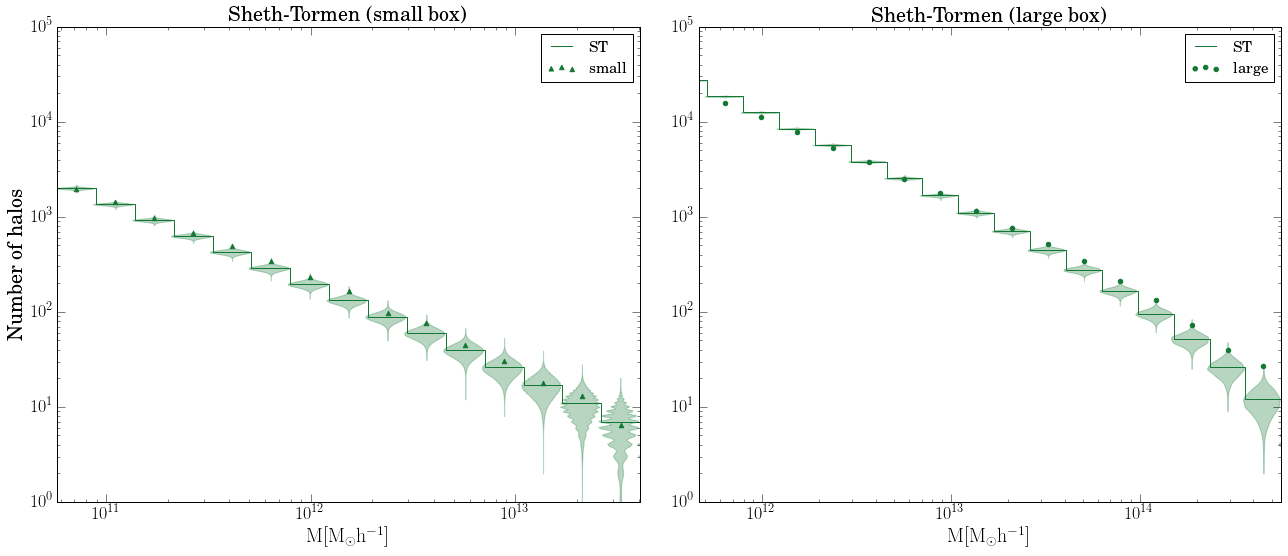

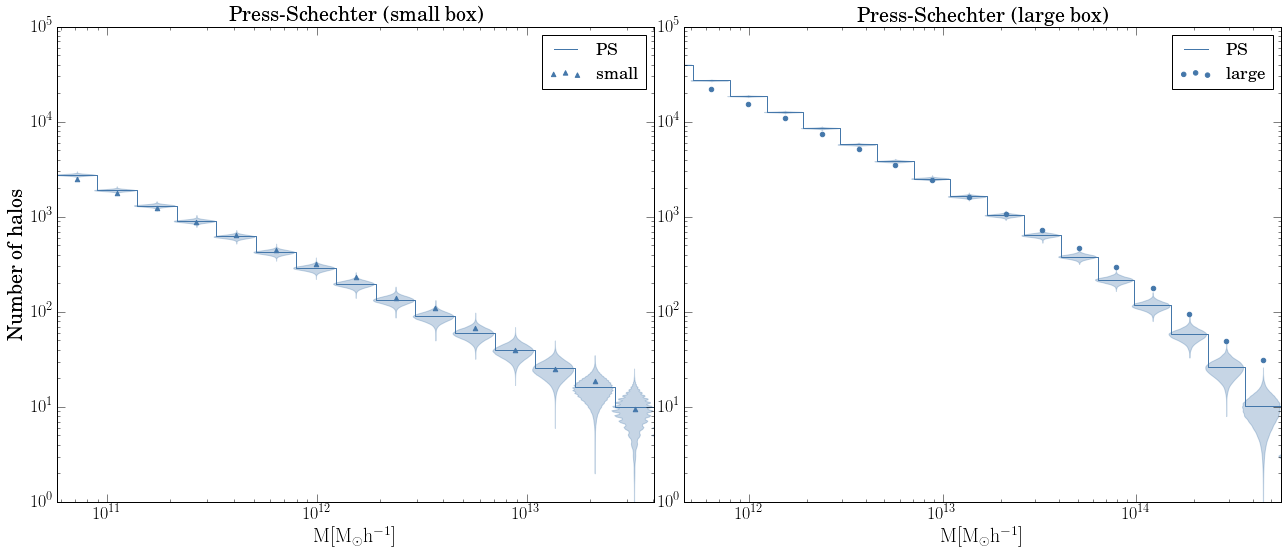

In [244]:
V = 50**3
V2 = 200**3

fig, (axes, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

poisson_st = [np.random.poisson(num_i, 70000) for num_i in num_theory_st*V]
vplot = axes.violinplot(poisson_st, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

axes.step(m_bins[:-1], num_theory_st*V, where="post", color=colors[3], label="ST")
axes.plot([m_bins[-2], m_bins[-1]], [num_theory_st[-1]*V, num_theory_st[-1]*V], color=colors[3])
[b.set_color(colors[3]) for b in vplot['bodies']]
          
#axes.scatter(10**mid_log[range_large_st], n_st_large[range_large_st]*V, label="large", color=colors[3])
axes.scatter(10**mid_log[range_small_st], n_st_small[range_small_st]*V, label="small", marker="^", color=colors[3])

#ax2.scatter(10**mid_log[range_small_st], n_st_small[range_small_st]*V2, label="small", marker="^", color=colors[3])

axes.legend(loc="best", fontsize=15)
axes.set_xscale("log")
axes.set_yscale("log")
axes.set_xlim(m_min_small, 
         10**(np.log10(m_max_st_small) + (delta_log_M/2)))
axes.set_ylabel("Number of halos")
axes.set_xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
axes.set_title("Sheth-Tormen (small box)")
axes.set_ylim(1, 10**5)


poisson_st2 = [np.random.poisson(num_i, 10000) for num_i in num_theory_st*V2]
vplot2 = ax2.violinplot(poisson_st2, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

ax2.step(m_bins[:-1], num_theory_st*V2, where="post", color=colors[3], label="ST")
ax2.plot([m_bins[-2], m_bins[-1]], [num_theory_st[-1]*V2, num_theory_st[-1]*V2], color=colors[3])
[b.set_color(colors[3]) for b in vplot2['bodies']]

ax2.scatter(10**mid_log[range_large_st], n_st_large[range_large_st]*V2, label="large", color=colors[3])

ax2.legend(loc="best", fontsize=15)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlim(m_min_large, 
         10**(np.log10(m_max_st_large) + (delta_log_M/2)))
# ax2.set_ylabel("Number of halos")
ax2.set_xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
ax2.set_title("Sheth-Tormen (large box)")
ax2.set_ylim(1, 10**5)

plt.subplots_adjust(left=0.1, wspace=0.1)
plt.savefig("/Users/lls/Documents/CODE/stored_files/hmf/plots/small_vs_large/ST_separate_boxes.png")

fig, (axes, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

poisson_ps = [np.random.poisson(num_i, 70000) for num_i in num_theory_ps*V]
vplot = axes.violinplot(poisson_ps, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

axes.step(m_bins[:-1], num_theory_ps*V, where="post", color=colors[0], label="PS")
axes.plot([m_bins[-2], m_bins[-1]], [num_theory_ps[-1]*V, num_theory_ps[-1]*V], color=colors[0])
[b.set_color(colors[0]) for b in vplot['bodies']]        
axes.scatter(10**mid_log[range_small_ps], n_ps_small[range_small_ps]*V, label="small", marker="^", color=colors[0])

axes.legend(loc="best", fontsize=17)
axes.set_xscale("log")
axes.set_yscale("log")
axes.set_xlim(m_min_small, 
         10**(np.log10(m_max_st_small) + (delta_log_M/2)))
axes.set_ylabel("Number of halos")
axes.set_xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
axes.set_title("Press-Schechter (small box)")
axes.set_ylim(1, 10**5)


poisson_ps2 = [np.random.poisson(num_i, 10000) for num_i in num_theory_ps*V2]
vplot2 = ax2.violinplot(poisson_ps2, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

ax2.step(m_bins[:-1], num_theory_ps*V2, where="post", color=colors[0], label="PS")
ax2.plot([m_bins[-2], m_bins[-1]], [num_theory_ps[-1]*V2, num_theory_ps[-1]*V2], color=colors[0])
[b.set_color(colors[0]) for b in vplot2['bodies']]
ax2.scatter(10**mid_log[range_large_ps], n_ps_large[range_large_ps]*V2, label="large", color=colors[0])

ax2.legend(loc="best", fontsize=17)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlim(m_min_large, 
         10**(np.log10(m_max_st_large) + (delta_log_M/2)))
# ax2.set_ylabel("Number of halos")
ax2.set_xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
ax2.set_title("Press-Schechter (large box)")
ax2.set_ylim(1, 10**5)

plt.subplots_adjust(left=0.1, wspace=0.05)
plt.savefig("/Users/lls/Documents/CODE/stored_files/hmf/plots/small_vs_large/PS_separate_boxes.png")

In [217]:
# Likelihoods

from scripts.hmf import likelihood as lh

V = 50**3

lh_small_ps = lh.chi_squared(n_ps_small[range_small_ps]*V, num_theory_ps[range_small_ps]*V)
lh_small_st = lh.chi_squared(n_st_small[range_small_st]*V, num_theory_st[range_small_st]*V)

lh_large_ps = lh.chi_squared(n_ps_large[range_large_ps]*V, num_theory_ps[range_large_ps]*V)
lh_large_st = lh.chi_squared(n_st_large[range_large_st]*V, num_theory_st[range_large_st]*V)

print("Likelihoods of empirical vs theoretical in SMALL box:"
      " ")

print("chi-sq of PS small box is " + "%.3f" % lh_small_ps 
      + " (dof = " + str(len(n_ps_small[range_small_ps])) + "). " 
      "Chi-sq/dof = "+"%.3f" % (lh_small_ps/len(n_ps_small[range_small_ps])))
print("chi-sq of ST small box is " + "%.3f" % lh_small_st 
      + " (dof = " + str(len(n_st_small[range_small_st])) + "). "
      "Chi-sq/dof = "+"%.3f" % (lh_small_st/len(n_st_small[range_small_st])))

print("chi-sq of PS large box is " + "%.3f" % lh_large_ps 
      + " (dof = " + str(len(n_ps_large[range_large_ps])) + "). "
      "Chi-sq/dof = "+"%.3f" % (lh_large_ps/len(n_ps_large[range_large_ps])))
print("chi-sq of ST large box is " + "%.3f" % lh_large_st 
      + " (dof = " + str(len(n_st_large[range_large_st])) + "). "
      "Chi-sq/dof = "+"%.3f" % (lh_large_st/len(n_st_large[range_large_st])))

Likelihoods of empirical vs theoretical in SMALL box: 
chi-sq of PS small box is 54.591 (dof = 15). Chi-sq/dof = 3.639
chi-sq of ST small box is 54.215 (dof = 14). Chi-sq/dof = 3.873
chi-sq of PS large box is 38.906 (dof = 16). Chi-sq/dof = 2.432
chi-sq of ST large box is 14.294 (dof = 16). Chi-sq/dof = 0.893


In [219]:
V2 = 200**3

lh_large_ps = lh.chi_squared(n_ps_large[range_large_ps]*V2, num_theory_ps[range_large_ps]*V2)
lh_large_st = lh.chi_squared(n_st_large[range_large_st]*V2, num_theory_st[range_large_st]*V2)


print("Likelihoods of empirical vs theoretical in LARGE box:"
      " ")

print("chi-sq of PS large box is " + "%.3f" % lh_large_ps 
      + " (dof = " + str(len(n_ps_large[range_large_ps])) + "). "
      "Chi-sq/dof = "+"%.3f" % (lh_large_ps/len(n_ps_large[range_large_ps])))
print("chi-sq of ST large box is " + "%.3f" % lh_large_st 
      + " (dof = " + str(len(n_st_large[range_large_st])) + "). "
      "Chi-sq/dof = "+"%.3f" % (lh_large_st/len(n_st_large[range_large_st])))

Likelihoods of empirical vs theoretical in LARGE box: 
chi-sq of PS large box is 2246.051 (dof = 16). Chi-sq/dof = 140.378
chi-sq of ST large box is 695.024 (dof = 16). Chi-sq/dof = 43.439


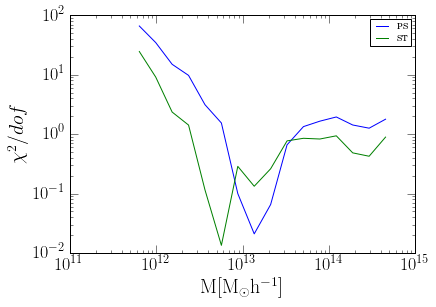

In [260]:
V2 = 200**3

chi_sq_ps_large = lh.chi_squared_each_bin(n_ps_large[range_large_ps]*V2, num_theory_ps[range_large_ps]*V2)
chi_sq_st_large = lh.chi_squared_each_bin(n_st_large[range_large_st]*V2, num_theory_st[range_large_st]*V2)

plt.plot(10**mid_log[range_large_ps], chi_sq_ps_large/ len(n_ps_large[range_large_ps]), label="PS", color="b")
plt.plot(10**mid_log[range_large_st], chi_sq_st_large/len(n_st_large[range_large_st]), label="ST", color="g")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
plt.ylabel(r"$\chi^2/dof$")
plt.legend(loc="best")
plt.savefig("/Users/lls/Desktop/chi_sq_reduced_per_mass_bin.png")

In [262]:
np.sum(chi_sq_st_large)

695.02371261937924

In [263]:
# large box simulation prediction
from scripts.hmf import halo_mass

m_true_large, n_sim_large = halo_mass.get_true_number_halos_per_mass_bins(ic, log_m_bins)

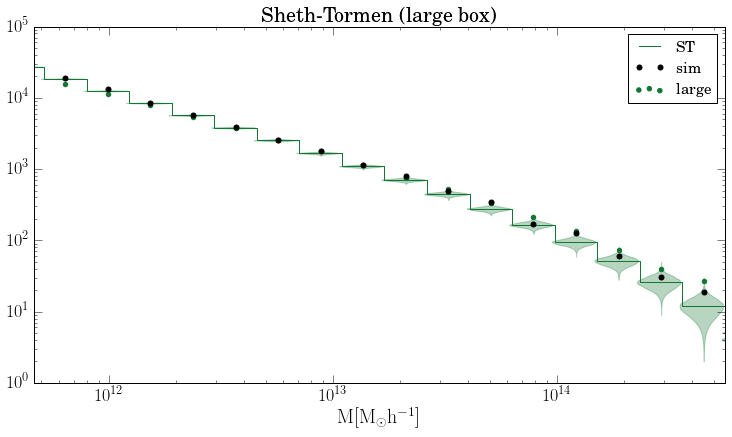

In [281]:
fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

poisson_st2 = [np.random.poisson(num_i, 10000) for num_i in num_theory_st*V2]
vplot2 = ax2.violinplot(poisson_st2, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

ax2.step(m_bins[:-1], num_theory_st*V2, where="post", color=colors[3], label="ST")
ax2.plot([m_bins[-2], m_bins[-1]], [num_theory_st[-1]*V2, num_theory_st[-1]*V2], color=colors[3])
[b.set_color(colors[3]) for b in vplot2['bodies']]

ax2.scatter(10**mid_log[range_large_st], n_st_large[range_large_st]*V2, label="large", color=colors[3])
# ax2.scatter(m_true_large[range_large_st], n_sim_large[range_large_st]*V2, label="sim", color="k")
ax2.plot(m_true_large, n_sim_large, "ko", label="sim", markersize=5)

ax2.legend(loc="best", fontsize=15)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlim(m_min_large, 
         10**(np.log10(m_max_st_large) + (delta_log_M/2)))
# ax2.set_ylabel("Number of halos")
ax2.set_xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
ax2.set_title("Sheth-Tormen (large box)")
ax2.set_ylim(1, 10**5)
plt.savefig("/Users/lls/Desktop/ST_vs_sim_large.png")

In [284]:
lh.chi_squared(n_sim_large[range_large_st], num_theory_st[range_large_st]*V2)/len(n_sim_large[range_large_st])

6.6192612736520084

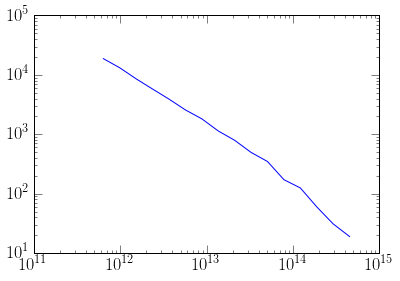

In [274]:
fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

poisson_ps2 = [np.random.poisson(num_i, 10000) for num_i in num_theory_ps*V2]
vplot2 = ax2.violinplot(poisson_ps2, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

ax2.step(m_bins[:-1], num_theory_ps*V2, where="post", color=colors[3], label="ST")
ax2.plot([m_bins[-2], m_bins[-1]], [num_theory_st[-1]*V2, num_theory_st[-1]*V2], color=colors[3])
[b.set_color(colors[3]) for b in vplot2['bodies']]

ax2.scatter(10**mid_log[range_large_st], n_st_large[range_large_st]*V2, label="large", color=colors[3])
# ax2.scatter(m_true_large[range_large_st], n_sim_large[range_large_st]*V2, label="sim", color="k")
ax2.plot(m_true_large, n_sim_large, "ko", label="sim", markersize=5)

ax2.legend(loc="best", fontsize=15)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlim(m_min_large, 
         10**(np.log10(m_max_st_large) + (delta_log_M/2)))
# ax2.set_ylabel("Number of halos")
ax2.set_xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
ax2.set_title("Sheth-Tormen (large box)")
ax2.set_ylim(1, 10**5)
plt.savefig("/Users/lls/Desktop/PS_vs_sim_large.png")

In [ ]:
poisson_ps2 = [np.random.poisson(num_i, 10000) for num_i in num_theory_ps*V2]
vplot2 = ax2.violinplot(poisson_ps2, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)


ax2.step(m_bins[:-1], num_theory_ps*V2, where="post", color=colors[0], label="PS")
ax2.plot([m_bins[-2], m_bins[-1]], [num_theory_ps[-1]*V2, num_theory_ps[-1]*V2], color=colors[0])
[b.set_color(colors[0]) for b in vplot2['bodies']]
ax2.scatter(10**mid_log[range_large_ps], n_ps_large[range_large_ps]*V2, label="large", color=colors[0])

ax2.legend(loc="best", fontsize=17)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlim(m_min_large, 
         10**(np.log10(m_max_st_large) + (delta_log_M/2)))
# ax2.set_ylabel("Number of halos")
ax2.set_xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
ax2.set_title("Press-Schechter (large box)")
ax2.set_ylim(1, 10**5)

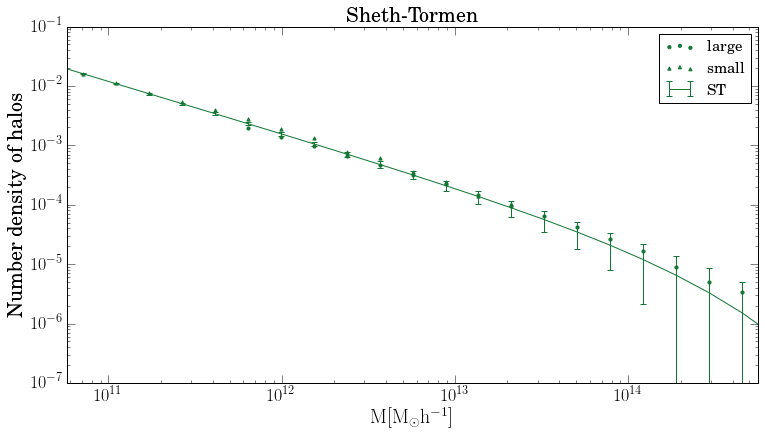

In [122]:
# Errorbars on the theory number density are Poisson errors on number of halos in box of size L=50 Mpc a h^-1

V = 50**3

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

err_num_den = np.sqrt(num_theory_st*V)/V
plt.errorbar(mass, num_theory_st, color=colors[3], yerr=err_num_den, label="ST")

          
plt.scatter(10**mid_log[range_large_st], n_st_large[range_large_st], label="large", color=colors[3], s=10)
plt.scatter(10**mid_log[range_small_st], n_st_small[range_small_st], label="small", marker="^", color=colors[3], s=10)

plt.legend(loc="best", fontsize=15)
plt.xscale("log")
plt.yscale("log")

plt.xlim(np.array([m_min_small, m_min_large]).min(), 
         10**(np.log10((np.array([m_max_st_large, m_max_st_small]).max())) + (delta_log_M/2)))
# plt.ylim(0, 10**4)

plt.ylabel("Number density of halos")
plt.xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
plt.title("Sheth-Tormen")

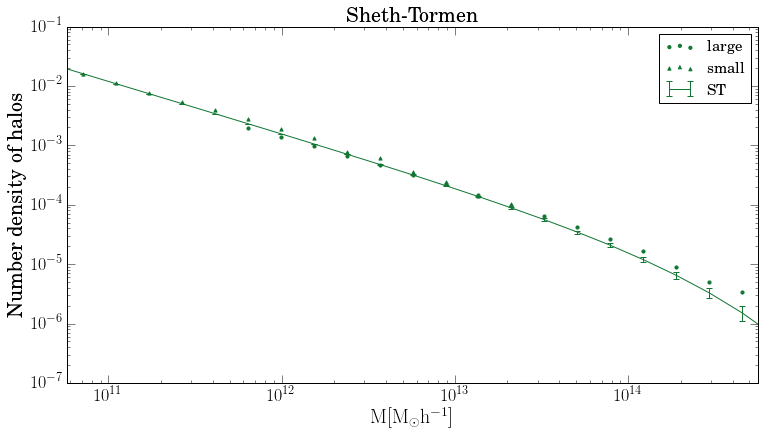

In [166]:
# Errorbars on the theory number density are Poisson errors on number of halos in box of size L= 200 Mpc a h^-1

V = 200**3

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

err_num_den = np.sqrt(num_theory_st*V)/V
plt.errorbar(mass, num_theory_st, color=colors[3], yerr=err_num_den, label="ST")

          
plt.scatter(10**mid_log[range_large_st], n_st_large[range_large_st], label="large", color=colors[3], s=10)
plt.scatter(10**mid_log[range_small_st], n_st_small[range_small_st], label="small", marker="^", color=colors[3], s=10)

plt.legend(loc="best", fontsize=15)
plt.xscale("log")
plt.yscale("log")

plt.xlim(np.array([m_min_small, m_min_large]).min(), 
         10**(np.log10((np.array([m_max_st_large, m_max_st_small]).max())) + (delta_log_M/2)))
# plt.ylim(0, 10**4)

plt.ylabel("Number density of halos")
plt.xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
plt.title("Sheth-Tormen")

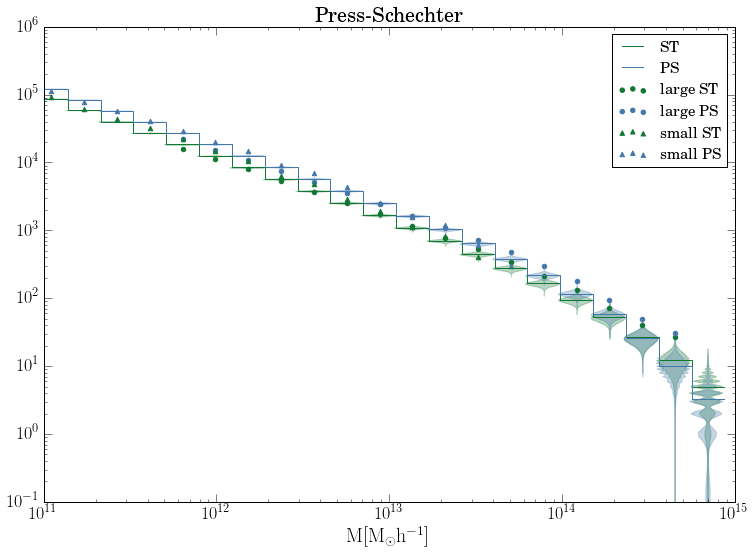

In [241]:
V = 200**3

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

poisson_st = [np.random.poisson(num_i, 70000) for num_i in num_theory_st*V]
vplot = axes.violinplot(poisson_st, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

axes.step(m_bins[:-1], num_theory_st*V, where="post", color=colors[3], label="ST")
axes.plot([m_bins[-2], m_bins[-1]], [num_theory_st[-1]*V, num_theory_st[-1]*V], color=colors[3])
[b.set_color(colors[3]) for b in vplot['bodies']]

poisson_ps = [np.random.poisson(num_i, 70000) for num_i in num_theory_ps*V]
vplot = axes.violinplot(poisson_ps, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

axes.step(m_bins[:-1], num_theory_ps*V, where="post", color=colors[0], label="PS")
axes.plot([m_bins[-2], m_bins[-1]], [num_theory_ps[-1]*V, num_theory_ps[-1]*V], color=colors[0])
[b.set_color(colors[0]) for b in vplot['bodies']]

axes.scatter(10**mid_log[range_large_st], n_st_large[range_large_st]*V2, label="large ST", color=colors[3])
axes.scatter(10**mid_log[range_large_ps], n_ps_large[range_large_ps]*V2, label="large PS", color=colors[0])

axes.scatter(10**mid_log[range_small_st], n_st_small[range_small_st]*V, label="small ST", marker="^", color=colors[3])
axes.scatter(10**mid_log[range_small_ps], n_ps_small[range_small_ps]*V, label="small PS", marker="^", color=colors[0])

axes.legend(loc="best", fontsize=15)
axes.set_xscale("log")
axes.set_yscale("log")
axes.set_xlim(10**11, 10**15)
# ax2.set_ylabel("Number of halos")
axes.set_xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
axes.set_title("Press-Schechter")

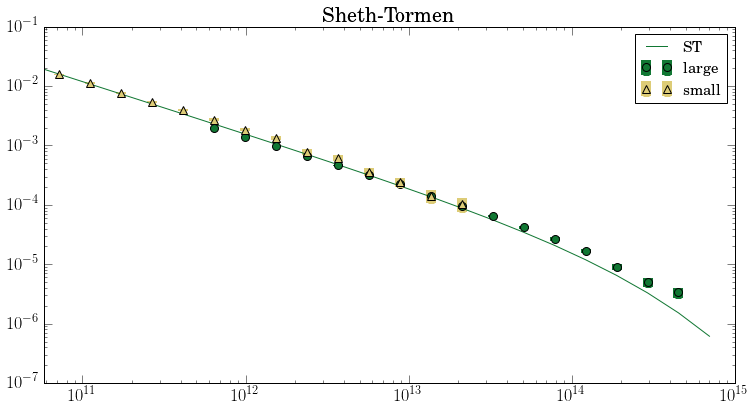

In [123]:
v_small = 50**3
v_large = 200**3


# range_small_st = (mass >= m_min_small)
# range_large_st = (mass >= m_min_large)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

plt.plot(mass, num_theory_st, color=colors[3], label="ST")

          
plt.errorbar(10**mid_log[range_large_st], n_st_large[range_large_st], yerr=np.sqrt(n_st_large[range_large_st]*v_large)/v_large, 
             fmt='o', label="large", color=colors[3], lw=10)
plt.errorbar(10**mid_log[range_small_st], n_st_small[range_small_st], yerr=np.sqrt(n_st_small[range_small_st]*v_small)/v_small, 
             label="small", fmt="^", color=colors[2], lw=10)

plt.legend(loc="best", fontsize=15)
plt.xscale("log")
plt.yscale("log")

plt.xlim(np.array([m_min_small, m_min_large]).min(), 10**15)
# plt.ylim(0, 10**4)
plt.title("Sheth-Tormen")

In [115]:
np.sqrt(n_st_large * v_large)/v_large

SimArray([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.44450620e-05,   2.12632898e-05,   1.86109960e-05,
         1.57047521e-05,   1.32066629e-05,   1.11009088e-05,
         9.12475071e-06,   7.63289439e-06,   6.27218337e-06,
         5.25099885e-06,   4.23111940e-06,   3.44904969e-06,
         2.85803352e-06,   2.29997503e-06,   1.82549891e-06,
         1.44313843e-06,   1.06187976e-06,   7.88688645e-07,
         6.49867940e-07,   3.76081244e-07], '1.00e+00')

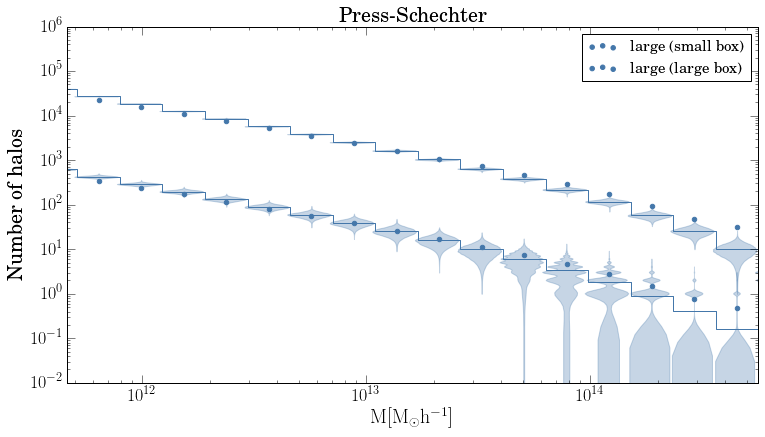

In [249]:
V = 50**3
V2 = 200**3

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

poisson_ps = [np.random.poisson(num_i, 10000) for num_i in num_theory_ps*V]
delta_m = np.diff(10**log_m_bins)

vplot = axes.violinplot(poisson_ps, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

axes.step(m_bins[:-1], num_theory_ps*V, where="post", color=colors[0])
axes.plot([m_bins[-2], m_bins[-1]], [num_theory_ps[-1]*V, num_theory_ps[-1]*V], color=colors[0])
[b.set_color(colors[0]) for b in vplot['bodies']]
          
axes.scatter(10**mid_log[range_large_ps], n_ps_large[range_large_ps]*V, label="large (small box)", color=colors[0])

poisson_ps2 = [np.random.poisson(num_i, 10000) for num_i in num_theory_ps*V2]
vplot2 = axes.violinplot(poisson_ps2, positions=mass, widths=delta_m, showextrema=False,showmeans=False,showmedians=False)

axes.step(m_bins[:-1], num_theory_ps*V2, where="post", color=colors[0])
axes.plot([m_bins[-2], m_bins[-1]], [num_theory_ps[-1]*V2, num_theory_ps[-1]*V2], color=colors[0])
[b.set_color(colors[0]) for b in vplot2['bodies']]
axes.scatter(10**mid_log[range_large_ps], n_ps_large[range_large_ps]*V2, label="large (large box)", color=colors[0])

# plt.scatter(10**mid_log, n_th, label="top-hat")
plt.legend(loc="best", fontsize=15)
plt.xscale("log")
plt.yscale("log")

plt.xlim(np.array([m_min_small, m_min_large]).max(), 
         10**(np.log10((np.array([m_max_ps_large, m_max_ps_small]).max())) + (delta_log_M/2)))
# plt.ylim(0, 10**4)

plt.ylabel("Number of halos")
plt.xlabel(r"$ \mathrm{M} [\mathrm{M}_{\odot} \mathrm{h}^{-1}]$")
plt.title("Press-Schechter")

In [250]:
print(n_ps_large[range_large_ps]*V2 / (n_ps_large[range_large_ps]*V))
num_theory_ps*V2 / ( num_theory_ps*V)

[ 64.  64.  64.  64.  64.  64.  64.  64.  64.  64.  64.  64.  64.  64.  64.
  64.]


SimArray([ 64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,
        64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,
        64.,  64.,  64.,  64.], '1.00e+00')